In [1]:
import pandas as pd
import numpy as np

# Datos

In [29]:
df = pd.read_csv('base_final_lugares.csv')

# Modelo para restaurantes

In [33]:
restaurantes = df.copy()
restaurantes = restaurantes[restaurantes['tipo_lugar']=='Comida mexicana']

In [31]:
#Columnas relevantes para modelo
restaurantes = restaurantes[['place_id', 'user_ratings_total', 'rating', 'price_level', 
                             'comida_norm', 'servicio_norm', 'ambiente_norm', 'satisfaccion_norm']]

In [34]:
restaurantes

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,...,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm,actividades,naturaleza,familiar,actividades_norm,naturaleza_norm,familiar_norm
1,ChIJWZ2zdav40YURFvsU_rU3uaE,Pujol,OPERATIONAL,19.432868,-99.194780,3173,4.6,http://pujol.com.mx/,4.0,"[{'height': 852, 'html_attributions': ['<a hre...",...,0.533333,0.304762,0.114286,0.447619,NaN,NaN,NaN,NaN,NaN,NaN
3,ChIJbS8EZf8B0oURwwD8B0MpqK0,Quintonil,OPERATIONAL,19.430841,-99.191711,1332,4.6,http://www.quintonil.com/,4.0,"[{'height': 4032, 'html_attributions': ['<a hr...",...,0.370787,0.348315,0.112360,0.471910,NaN,NaN,NaN,NaN,NaN,NaN
5,ChIJhX6jMpj50YUR3poUnV408b4,Monte Cristo,CLOSED_TEMPORARILY,19.492165,-99.120832,1625,4.6,http://www.rmontecristo.com/,3.0,"[{'height': 2592, 'html_attributions': ['<a hr...",...,0.909091,0.556818,0.340909,0.590909,NaN,NaN,NaN,NaN,NaN,NaN
7,ChIJrfTq9Tr_0YURAW5g2EXpLMY,99,OPERATIONAL,19.418777,-99.159454,887,4.6,https://www.nuevenueve.com.mx/,3.0,"[{'height': 6720, 'html_attributions': ['<a hr...",...,0.625000,0.545455,0.318182,0.488636,NaN,NaN,NaN,NaN,NaN,NaN
8,ChIJ21LyB_f_0YURW_F1RfqWhiI,Guadiana,OPERATIONAL,19.350735,-99.187180,643,4.6,http://www.guadiana.com.mx/,3.0,"[{'height': 2000, 'html_attributions': ['<a hr...",...,0.626866,0.447761,0.283582,0.552239,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,ChIJkzWrrxX5zYURjohBBW22J98,El Antojito,OPERATIONAL,19.326378,-99.282982,9,4.8,https://el-antojito-restaurant.negocio.site/,NaN,"[{'height': 720, 'html_attributions': ['<a hre...",...,0.600000,0.200000,0.000000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN
255,ChIJLUG4-p750YURr_H6VaVUHFg,Sahmich,OPERATIONAL,19.484713,-99.120000,54,4.6,https://sahmich.negocio.site/,NaN,"[{'height': 4160, 'html_attributions': ['<a hr...",...,1.000000,0.187500,0.000000,0.375000,NaN,NaN,NaN,NaN,NaN,NaN
256,ChIJZ-dNcTr_0YURvT79FclhNi0,Birria Estilo Jalisco - Food Stand,OPERATIONAL,19.419889,-99.160511,79,4.6,NaN,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",...,0.536585,0.146341,0.000000,0.268293,NaN,NaN,NaN,NaN,NaN,NaN
257,ChIJz9WtHqH50YURYyIo8N1otO8,Tortas El Volcan,OPERATIONAL,19.482766,-99.126393,57,4.6,NaN,NaN,"[{'height': 4608, 'html_attributions': ['<a hr...",...,0.562500,0.125000,0.000000,0.281250,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
restaurantes.corr()

,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
user_ratings_total,1.000000,-0.334310,0.363109,-0.497263,-0.225842,-0.118674,-0.252751
rating,-0.334310,1.000000,0.111716,0.163580,0.174837,0.147982,0.540868
price_level,0.363109,0.111716,1.000000,-0.555073,0.324138,0.349116,0.402884
comida_norm,-0.497263,0.163580,-0.555073,1.000000,0.247014,0.110083,0.163226
servicio_norm,-0.225842,0.174837,0.324138,0.247014,1.000000,0.420429,0.517119
ambiente_norm,-0.118674,0.147982,0.349116,0.110083,0.420429,1.000000,0.366137
satisfaccion_norm,-0.252751,0.540868,0.402884,0.163226,0.517119,0.366137,1.000000


In [7]:
restaurantes.isna().sum()

place_id               0
user_ratings_total     0
rating                 0
price_level           41
comida_norm            1
servicio_norm          1
ambiente_norm          1
satisfaccion_norm      1
dtype: int64

In [8]:
columns_list = restaurantes.columns 

In [9]:
restaurantes_label = restaurantes[columns_list[0]]
restaurantes_variables = restaurantes[columns_list[1:]]

# Limpieza

In [10]:
# Imputar nulos
from sklearn.impute import KNNImputer

In [11]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(restaurantes_variables)
# transform the dataset
restaurantes_imputed = imputer.transform(restaurantes_variables)

In [12]:
restaurantes_imputed_df = pd.DataFrame(restaurantes_imputed, columns=[columns_list[1:]])

In [13]:
# Escalar valores
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
restaurantes_imputed_scaled = scaler.fit_transform(restaurantes_imputed)

In [14]:
restaurantes_imputed_df = pd.DataFrame(restaurantes_imputed_scaled, columns=[columns_list[1:]])

# Clusterización

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

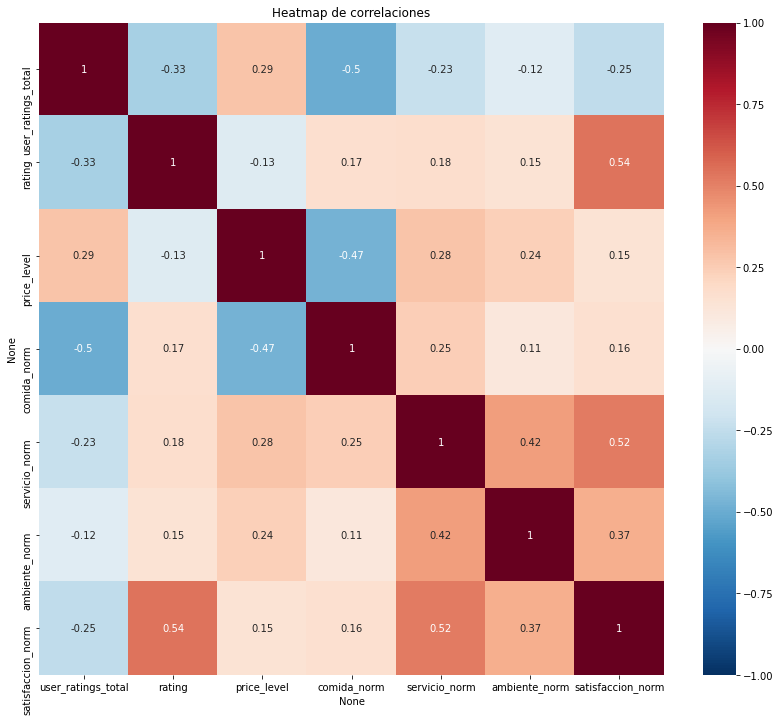

In [16]:
correlation = restaurantes_imputed_df.corr()
#display(correlation)
plt.figure(figsize=(14, 12))

heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.title('Heatmap de correlaciones')
plt.show()

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [18]:
# Variables para clusterizar
x = ['price_level', 'comida_norm', 'servicio_norm', 'ambiente_norm']

In [19]:
clusters = restaurantes_imputed_df.copy()
clusters = clusters[x]

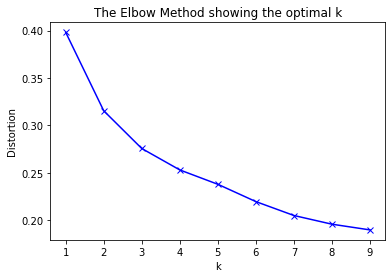

In [20]:
mat = clusters.values

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(mat)
    kmeanModel.fit(mat)
    distortions.append(sum(np.min(cdist(mat, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mat.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
## Unsupervised method
kmeans = KMeans(n_clusters=5, random_state=0).fit(mat)
# Get cluster assignment labels
labels = kmeans.labels_
# Format results as a DataFrame
restaurantes_imputed_df['cluster'] = labels.T.tolist()

In [22]:
#Guardar resultados
restaurantes_imputed_df.to_csv('knn_restaurantes_results.csv', index=False)

In [23]:
restaurants_results = pd.read_csv('knn_restaurantes_results.csv')

In [25]:
restaurants_results.head(1)

,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm,cluster
0,0.001676,0.5,0.133333,0.661158,0.417739,0.518033,0.30514,2


In [28]:
import plotly.express as px
fig = px.scatter_3d(restaurants_results, x='comida_norm', y='ambiente_norm', z='servicio_norm',
              color='price_level')
fig.show()